# Machine Learning applied to House Prices Prediction

###Data fields  
Here's a brief version of what you'll find in the data description file.  

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating  
YearBuilt: Original construction date   
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms    
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality  
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity  
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality  
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale   
SaleCondition: Condition of sale  

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import skew

##Exploratory Data Analysis

In [93]:
X_train = pd.read_csv('https://raw.githubusercontent.com/leovcunha/house-prices-advanced-regression/master/data/train.csv')
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
missing_data = X_train.isnull().sum().sort_values(ascending=False)[missing_data.values > 0]
print(missing_data)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


Handling missing values:  
PoolQC and MiscFeature will be dropped for not contributing to anything  
evaluation: `X_train['PoolQC'].dropna().sample(n=5)`

---



In [0]:

X_train2 = X_train.drop(['Id','PoolQC', 'MiscFeature'], axis=1)
missing_data = missing_data.drop(['PoolQC', 'MiscFeature'])



In [99]:
[X_train2[x].fillna('No', inplace=True) if X_train2[x].dtype == np.object else X_train2[x].fillna(0, inplace=True) for x in missing_data.index]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [100]:
X_train2.sample(n=20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1248,75,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,0,No,0,4,2008,WD,Normal,129500
1245,80,RL,78.0,12090,Pave,No,Reg,Lvl,AllPub,Inside,...,0,147,0,No,0,1,2007,WD,Abnorml,178000
1147,70,RL,75.0,12000,Pave,No,Reg,Bnk,AllPub,Inside,...,0,0,0,No,0,7,2009,WD,Normal,174500
324,80,RL,96.0,11275,Pave,No,Reg,Lvl,AllPub,Corner,...,0,0,0,No,0,6,2010,WD,Normal,242000
162,20,RL,95.0,12182,Pave,No,Reg,Lvl,AllPub,Corner,...,0,0,0,No,0,5,2010,New,Partial,220000
1028,50,RL,79.0,9492,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,0,No,0,4,2007,WD,Normal,105000
230,20,RL,73.0,8760,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,0,No,0,4,2010,WD,Normal,148000
1210,60,RL,70.0,11218,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,400,5,2010,WD,Normal,189000
1409,60,RL,46.0,20544,Pave,No,IR1,Lvl,AllPub,CulDSac,...,0,0,0,MnPrv,0,11,2008,WD,Normal,215000
990,60,RL,82.0,9452,Pave,No,Reg,Lvl,AllPub,Inside,...,0,0,0,No,0,6,2006,WD,Normal,348000


In [101]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

## Correlation Analysis   
something great and freshly learned:



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


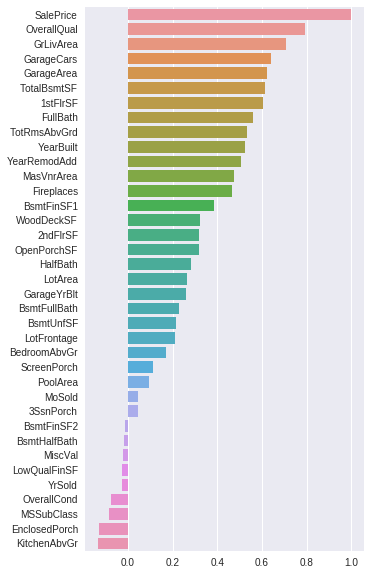

In [142]:
corr = X_train2.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
plt.figure(figsize=(5,10))
sns.barplot(corr['SalePrice'].values, corr['SalePrice'].index)

Instead of looking into the ones that are highly correlated we'll look into those features that are lowly correlated

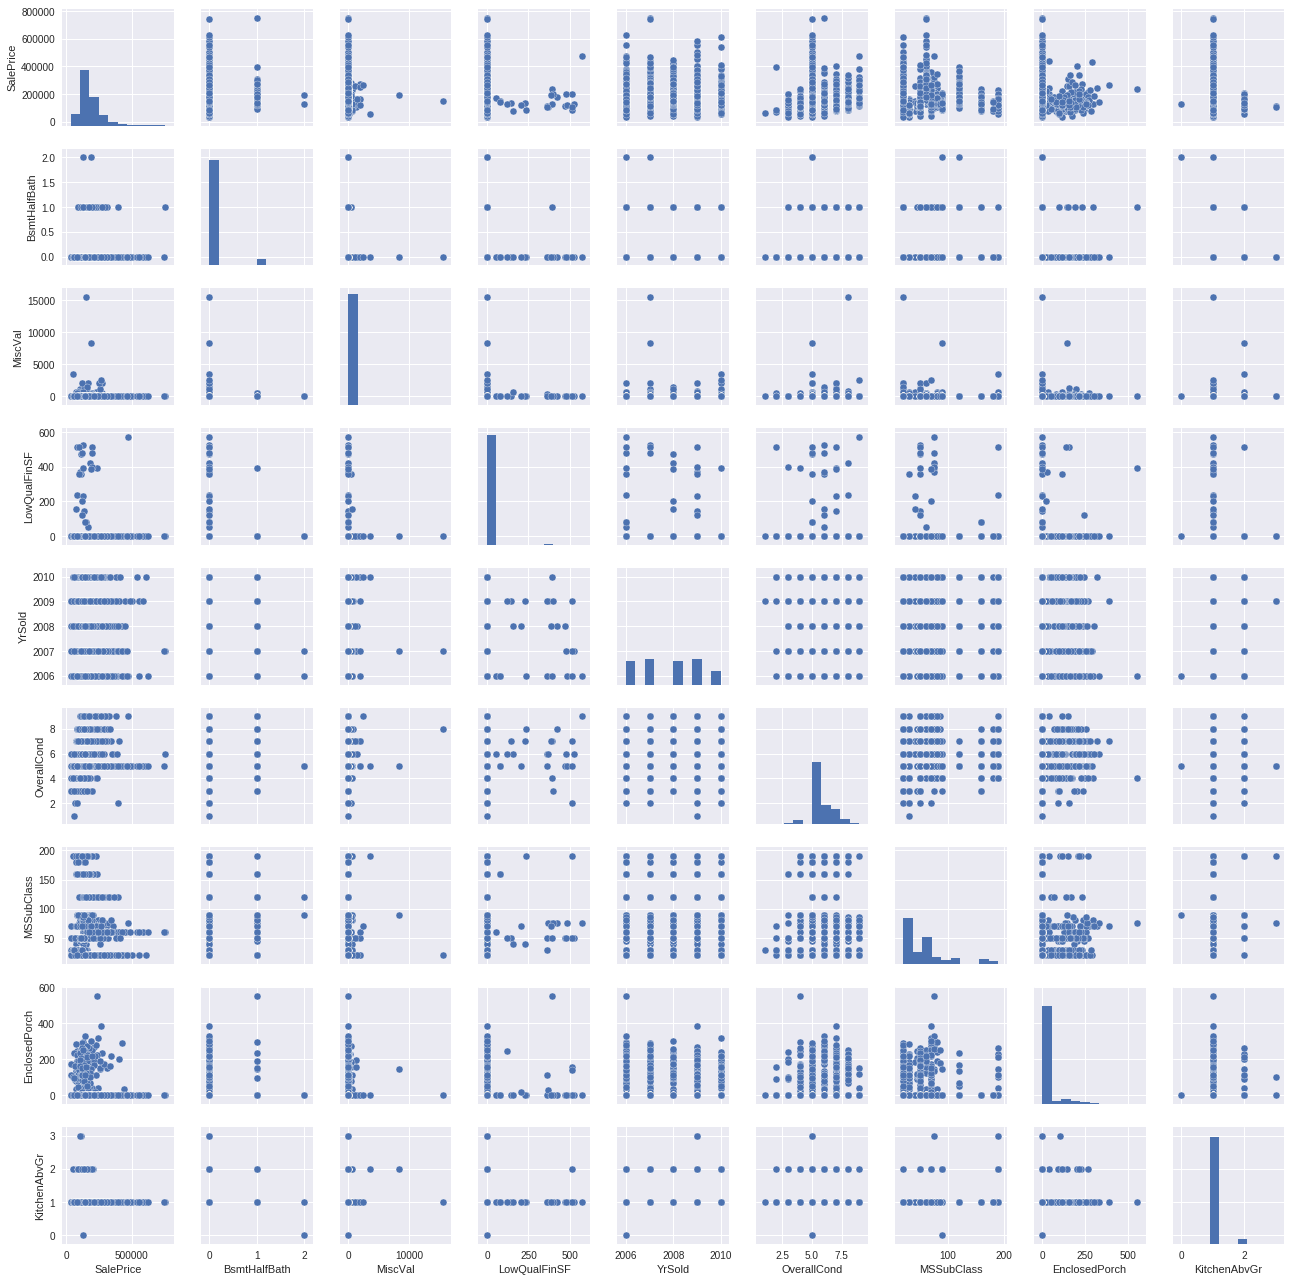

In [185]:
sns.pairplot(X_train2[['SalePrice','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr']], size = 2);

Basement Half Bath, LowQualFinSF,  is correlating inversely with the sell price it means less of these higher the price.  
Yearsold, miscVal, enclosedporch and others not correlating are dropped

In [0]:
X_train2 = X_train2.drop(['MiscVal','YrSold','OverallCond','EnclosedPorch'], axis=1);

MSSubClass is in reality categorical class need to be dealt with


In [0]:
X_train2['MSSubClass'] = X_train2['MSSubClass'].astype(str)

### Fixing "skewed" features.  
For your coefficients to be interpretable, linear regression assumes a bunch of things.
One of these things is **no multicollinearity**. That is, your X variables should not be correlated against each other.
Another is Homoscedasticity. The errors your model commits should have the same variance, i.e. you should ensure the** linear regression does not make small errors for low values of X and big errors for higher values of X**. In other words, the difference between what you predict Y^ and the true values Y should be constant. You can **ensure that by making sure that Y follows a Gaussian distribution.** (The proof is highly mathematical.)

Depending on your data, you may be able to make it Gaussian. Typical transformations are taking the inverse, the logarithm or square roots. Many others exist of course, it all depends on your data. You have to look at your data, and then do a histogram or run a normality test, such as the Shapiro-Wilk test.

These are all techniques to build an unbiased estimator. I don't think it has anything to do with convergence as others have said (sometimes you may also want to normalize your data, but that is a different topic).

Following the linear regression assumptions is important if you want to either interpret the coefficients or if you want to use statistical tests in your model. Otherwise, forget about it.

Applying the logarithm or normalizing your data, is also important because linear regression optimization algorithms typically minimize ∥y^−y∥2, so if you have some big y outliers, your estimator is going to be VERY concerned about minimizing those, since it is concerned about the squared error, not absolute error. Normalizing your data is important in those case and this is why scikit-learn has a normalize option in the LinearRegression constructor.

(https://datascience.stackexchange.com/questions/20237/why-do-we-convert-skewed-data-into-a-normal-distribution)



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


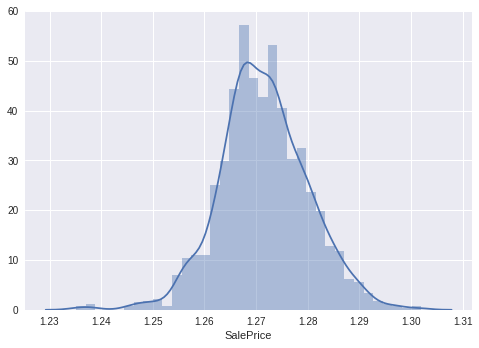

In [201]:
X_train2["SalePrice"] = np.log1p(X_train2["SalePrice"])
sns.distplot(X_train2['SalePrice']);

In [0]:
y_train = X_train2.SalePrice.values

In [207]:
numeric_feats = X_train2.dtypes[X_train2.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = X_train2[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784


In [0]:
from scipy.special import boxcox1p
for feat in skewness.index:
    X_train2[feat] = boxcox1p(X_train2[feat], 0.15)
    X_train2[feat] += 1

In [210]:
X_train2 = pd.get_dummies(X_train2)
print(X_train2.shape)

(1460, 305)


In [216]:
X_train2.info()
X = X_train2.drop(['SalePrice'],axis=1)
y = y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 305 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(32), uint8(273)
memory usage: 754.3 KB


## Modelling and predictions

In [0]:
from sklearn.linear_model import ElasticNet, RidgeCV, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [227]:
alphas = np.arange(0.1, 50, 0.2)
ridge = RidgeCV(alphas)
ridge.fit(X_train, y_train)
ridge_train_score = rmse_cv_train(ridge)
ridge_test_score = rmse_cv_test(ridge)
print('train score', ridge_train_score)
print('test score', ridge_test_score)

train score [0.00231589 0.00418569 0.00258172 0.00297444 0.00321396 0.002585
 0.00225252 0.00269594 0.00241366 0.00246745]
test score [0.00356993 0.00324109 0.00298749 0.00251539 0.00359454 0.00619598
 0.00284544 0.00238078 0.00350496 0.00258293]
